In [34]:
import pandas as pd

In [35]:
data = pd.read_csv('/content/insurance.csv')

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [37]:
import numpy as np
ages = data['age'].values #Created  a vector of age.
print(ages)

[19 18 28 ... 18 21 61]


In [38]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})
data['region'] = pd.Categorical(data['region']).codes

<ipython-input-38-86db77fcbb38>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
<ipython-input-38-86db77fcbb38>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})


In [39]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86


In [40]:
sex_factor = pd.Categorical(data['sex'])
print(sex_factor)

[1, 0, 0, 0, 0, ..., 0, 1, 1, 1, 1]
Length: 1338
Categories (2, int64): [0, 1]


In [41]:
data_list = [ages,sex_factor] #created a list
print(data_list)

[array([19, 18, 28, ..., 18, 21, 61]), [1, 0, 0, 0, 0, ..., 0, 1, 1, 1, 1]
Length: 1338
Categories (2, int64): [0, 1]]


In [42]:
matrix = data[['age','expenses']].to_numpy() #createda matrix
print(matrix)

[[1.900000e+01 1.688492e+04]
 [1.800000e+01 1.725550e+03]
 [2.800000e+01 4.449460e+03]
 ...
 [1.800000e+01 1.629830e+03]
 [2.100000e+01 2.007950e+03]
 [6.100000e+01 2.914136e+04]]


In [43]:
insurance_df = data    #dataframe
print(insurance_df.head())
print(insurance_df)

   age  sex   bmi  children  smoker  region  expenses
0   19    1  27.9         0       1       3  16884.92
1   18    0  33.8         1       0       2   1725.55
2   28    0  33.0         3       0       2   4449.46
3   33    0  22.7         0       0       1  21984.47
4   32    0  28.9         0       0       1   3866.86
      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
1      18    0  33.8         1       0       2   1725.55
2      28    0  33.0         3       0       2   4449.46
3      33    0  22.7         0       0       1  21984.47
4      32    0  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       1  10600.55
1334   18    1  31.9         0       0       0   2205.98
1335   18    1  36.9         0       0       2   1629.83
1336   21    1  25.8         0       0       3   2007.95
1337   61    1  29.1         0       1       1  2

# Number of Smokers by age

In [60]:
smokers = data[data['smoker'] == 1]
smokers_by_age = smokers.groupby('age').size()
print(smokers_by_age.sort_values(ascending=False).head())

age
19    18
18    12
43    12
47    10
27     9
dtype: int64


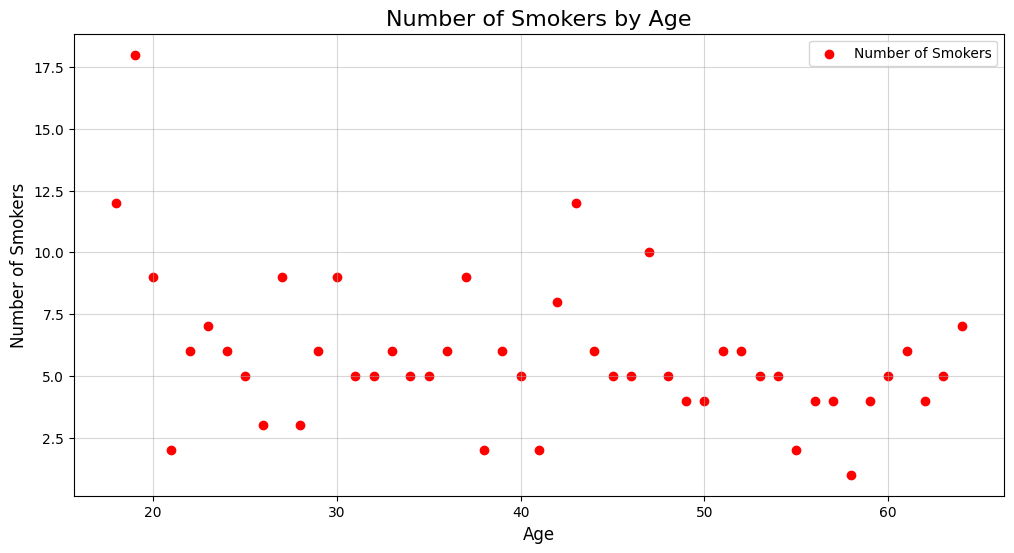

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(smokers_by_age.index, smokers_by_age.values, marker='o', color='red', label='Number of Smokers')
plt.title("Number of Smokers by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Number of smokers by ages between 20 and 40

In [46]:
smokers_filtered = smokers_by_age[(smokers_by_age.index>=20) & (smokers_by_age.index<=40)]

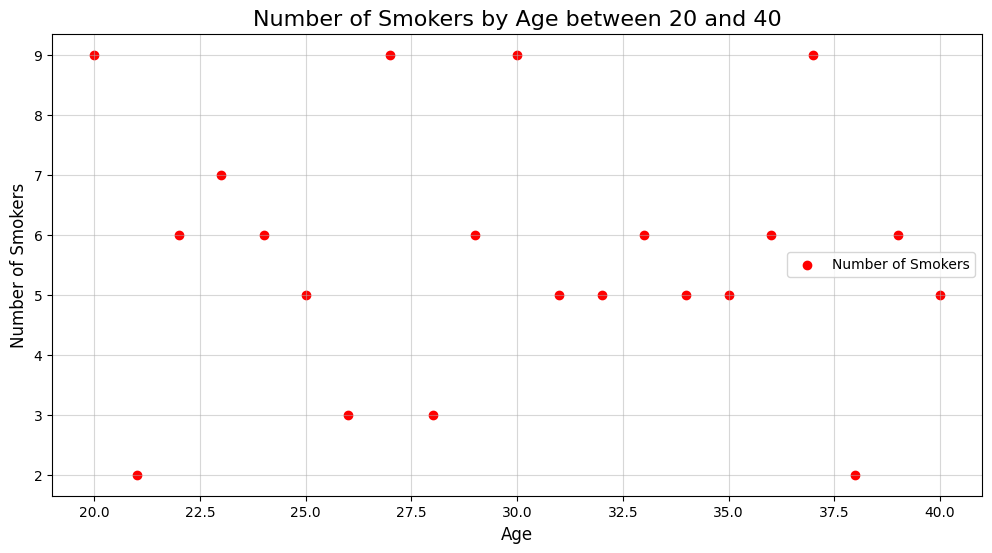

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(smokers_filtered.index, smokers_filtered.values, marker='o', color='red', label='Number of Smokers')
plt.title("Number of Smokers by Age between 20 and 40", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# AGE VS BMI

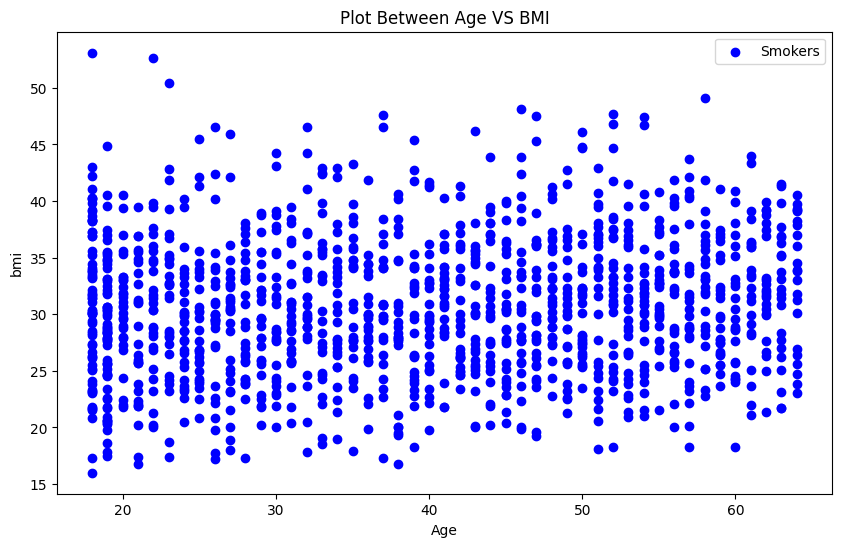

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], c='blue', marker='o', label='Smokers')
plt.title("Plot Between Age VS BMI")
plt.xlabel("Age")
plt.ylabel("bmi")
plt.legend()
plt.show()

# Filtered the data according to expenses

In [49]:
filtered_data = data[data['expenses'] > 20000]
print(filtered_data)

      age  sex   bmi  children  smoker  region  expenses
3      33    0  22.7         0       0       1  21984.47
9      60    1  25.8         0       0       1  28923.14
11     62    1  26.3         0       1       2  27808.73
14     27    0  42.1         0       1       2  39611.76
19     30    0  35.3         0       1       3  36837.47
...   ...  ...   ...       ...     ...     ...       ...
1313   19    1  34.7         2       1       3  36397.58
1321   62    0  26.7         0       1       0  28101.33
1323   42    1  40.4         2       1       2  43896.38
1328   23    1  24.2         2       0       0  22395.74
1337   61    1  29.1         0       1       1  29141.36

[273 rows x 7 columns]


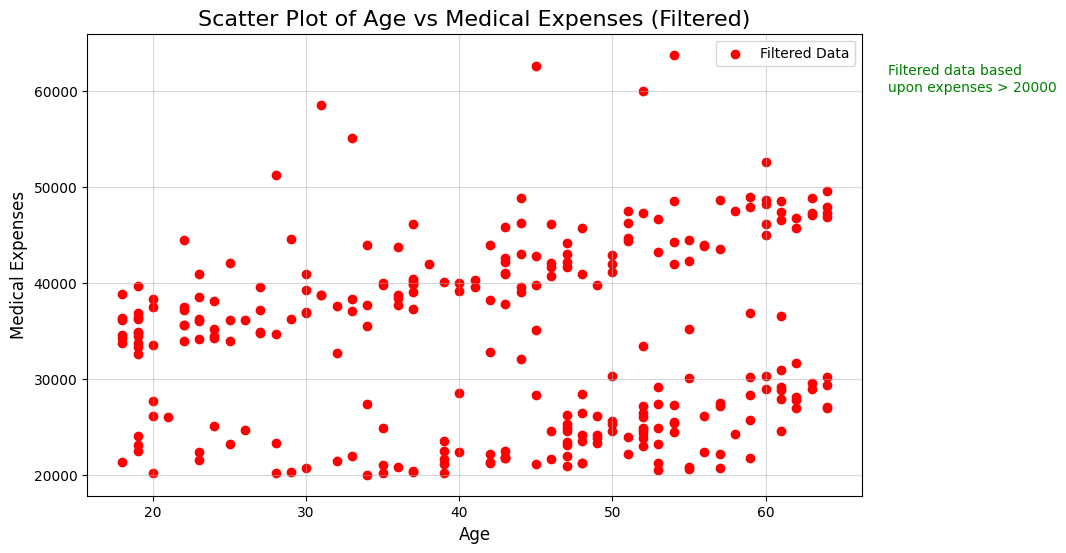

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='red', marker='o', label='Filtered Data')
plt.title("Scatter Plot of Age vs Medical Expenses (Filtered)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.text(68, 60000, "Filtered data based \nupon expenses > 20000", fontsize=10, color='green')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [51]:
data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


# Number of Smokers by Age (Age > 39)

In [57]:
smokersabove39 = data[(data['smoker'] == 1) & (data['age'] > 39)]
print(smokersabove39)

      age  sex   bmi  children  smoker  region  expenses
11     62    1  26.3         0       1       2  27808.73
39     60    0  39.9         0       1       3  48173.36
52     48    0  28.0         1       1       3  23568.27
55     58    0  37.0         2       1       1  47496.49
58     53    1  22.9         1       1       2  23244.79
...   ...  ...   ...       ...     ...     ...       ...
1303   43    0  27.8         0       1       3  37829.72
1304   42    0  24.6         2       1       0  21259.38
1321   62    0  26.7         0       1       0  28101.33
1323   42    1  40.4         2       1       2  43896.38
1337   61    1  29.1         0       1       1  29141.36

[130 rows x 7 columns]


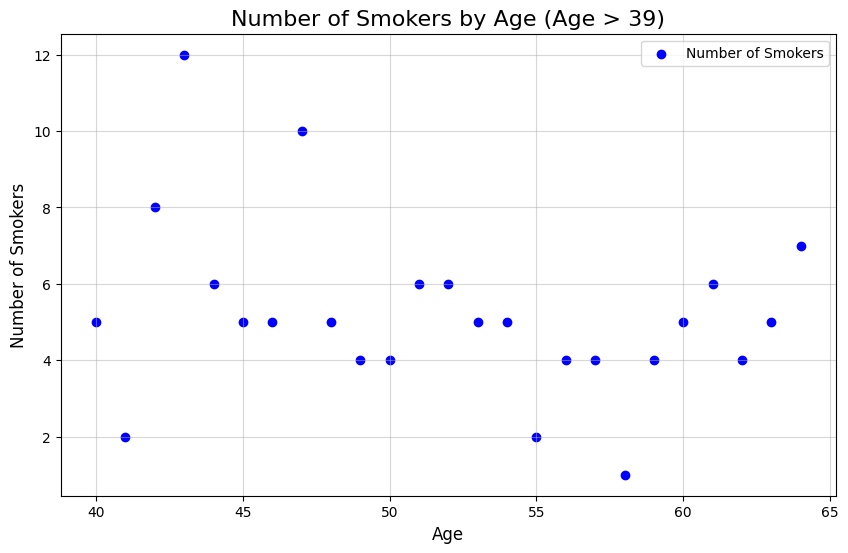

In [58]:
# Count number of smokers by age
age_counts = smokersabove39['age'].value_counts()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_counts.index, age_counts.values, marker='o', color='blue', label='Number of Smokers')
plt.title("Number of Smokers by Age (Age > 39)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()


# Number of Smokers by Age (Age <= 39)

In [53]:
smokersbelow39 = data[(data['smoker'] == 1) & (data['age'] <= 39)]
print(smokersbelow39)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
14     27    0  42.1         0       1       2  39611.76
19     30    0  35.3         0       1       3  36837.47
23     34    1  31.9         1       1       0  37701.88
29     31    0  36.3         2       1       3  38711.00
...   ...  ...   ...       ...     ...     ...       ...
1306   29    1  21.9         0       1       0  16115.30
1307   32    0  28.1         4       1       1  21472.48
1308   25    1  30.2         0       1       3  33900.65
1313   19    1  34.7         2       1       3  36397.58
1314   30    1  23.7         3       1       1  18765.88

[144 rows x 7 columns]


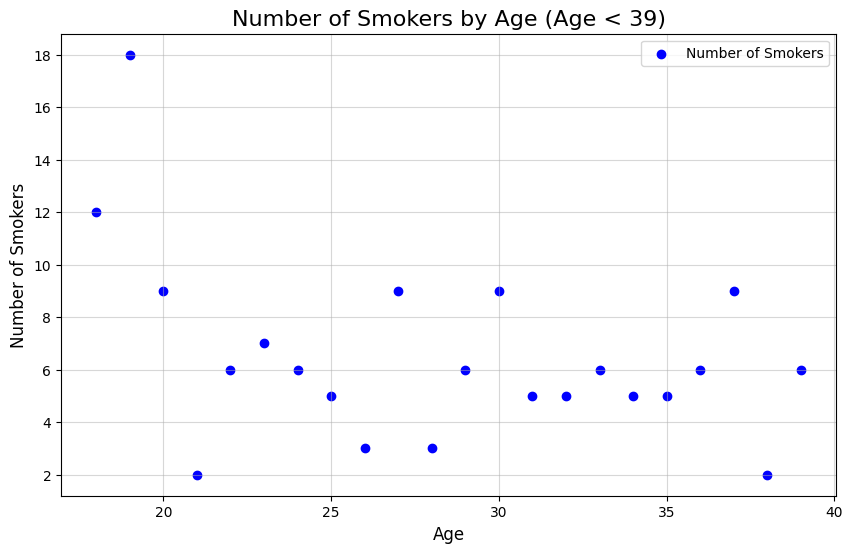

In [59]:
# Count number of smokers by age
age_counts = smokersbelow39['age'].value_counts()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_counts.index, age_counts.values, marker='o', color='blue', label='Number of Smokers')
plt.title("Number of Smokers by Age (Age < 39)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()


# Expenses vs. Age (Smokers vs. Non-Smokers)

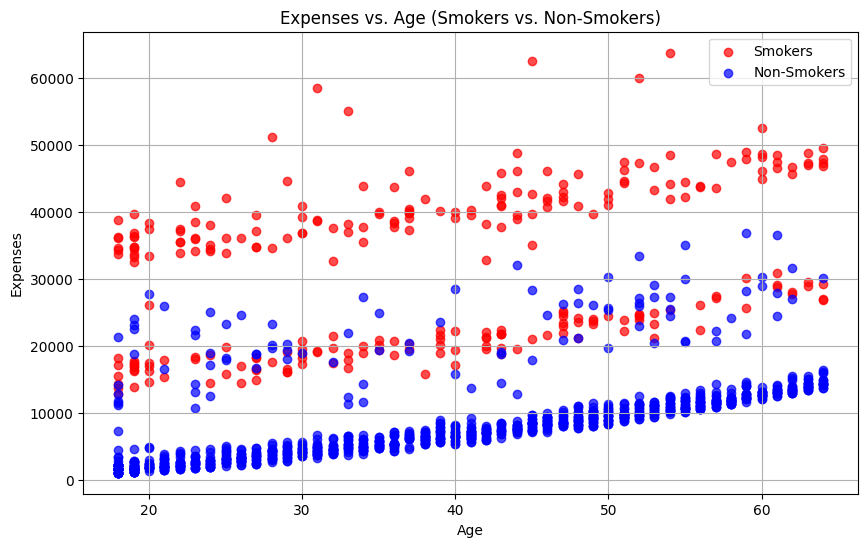

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['smoker'] == 1]['age'],  data[data['smoker'] == 1]['expenses'], label='Smokers', alpha=0.7, color='red')
plt.scatter(data[data['smoker'] == 0]['age'], data[data['smoker'] == 0]['expenses'], label='Non-Smokers', alpha=0.7, color='blue')

plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Expenses vs. Age (Smokers vs. Non-Smokers)')
plt.legend()
plt.grid(True)
plt.show()
